In [1]:
# Mengimpor library numpy dan pandas
import numpy as np
import pandas as pd

# Membaca file "data mhs.csv" dan menyimpannya ke dalam variabel data_mahasiswa
data_mahasiswa = pd.read_csv("data mhs.csv")
data_mahasiswa

,mhs,ipk,gaji
0,A,3.00,10
1,B,2.99,1


In [2]:
# data ipk
# mengubah data mahasiswa menjadi array
data_ipk = np.array(data_mahasiswa)
# memilih kolom 0 dan 1 dari data ipk
data_ipk = data_ipk[:,[0,1]]

# menghitung total ipk untuk mahasiswa A
ipk_A = np.sum(data_ipk[0:1,1], axis=0)
# menghitung total ipk untuk mahasiswa B
ipk_B = np.sum(data_ipk[1:2,1], axis=0)

print("ipk_A: ", ipk_A)
print("ipk_B: ", ipk_B)

ipk_A:  3.0
ipk_B:  2.99


In [3]:
# data gaji
# mengubah data mahasiswa menjadi array gaji
data_gaji = np.array(data_mahasiswa)
data_gaji = data_gaji[:,[0,2]]

# menghitung total gaji untuk mahasiswa A
gaji_A = np.sum(data_gaji[0:1,1], axis=0)
# menghitung total gaji untuk mahasiswa B
gaji_B = np.sum(data_gaji[1:2,1], axis=0)

print("gaji_A: ", gaji_A)
print("gaji_B: ", gaji_B)

gaji_A:  10
gaji_B:  1


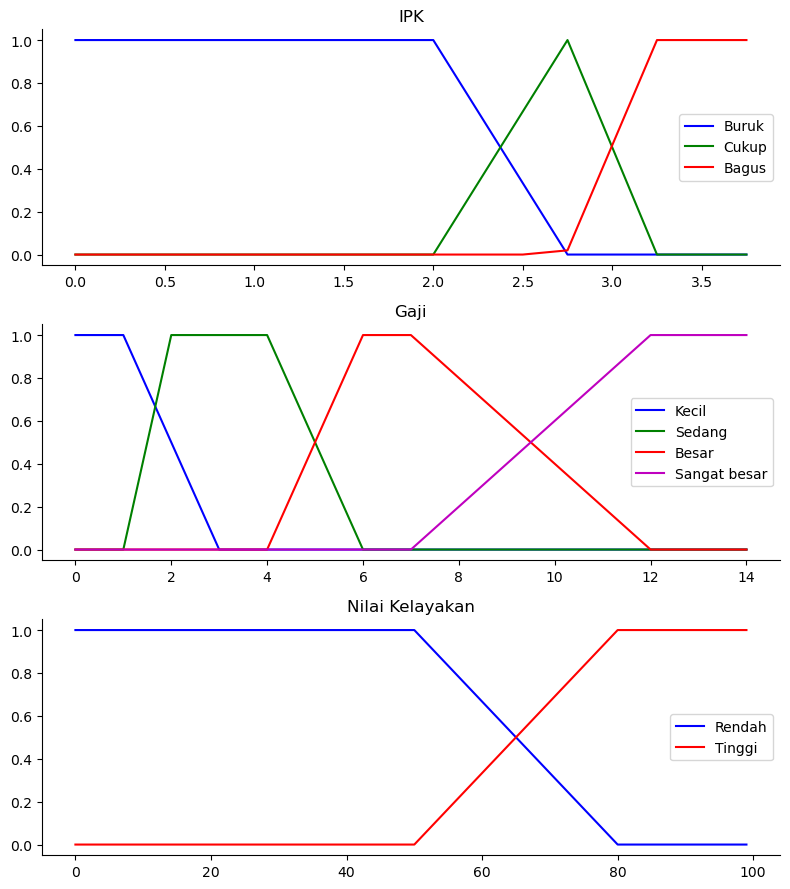

In [6]:
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import numpy as np

# Semesta Pembicaraan
x_ipk = np.arange(0, 4, 0.25)
x_gaji = np.arange(0, 15, 1)
x_nk = np.arange(0, 100, 1)

# Membership Function
# ipk
ipk_buruk = fuzz.trapmf(x_ipk, [0, 0, 2, 2.75])
ipk_cukup = fuzz.trimf(x_ipk, [2, 2.75, 3.25])
ipk_bagus = fuzz.trapmf(x_ipk, [2.74, 3.25, 4, 4])

# Gaji
gaji_kecil = fuzz.trapmf(x_gaji, [0, 0, 1, 3])
gaji_sedang = fuzz.trapmf(x_gaji, [1, 2, 4, 6])
gaji_besar = fuzz.trapmf(x_gaji, [4, 6, 7, 12])
gaji_sangat_besar = fuzz.trapmf(x_gaji, [7, 12, 15, 15])

# Nilai kelayakan
nk_rendah = fuzz.trapmf(x_nk, [0, 0, 50, 80])
nk_tinggi = fuzz.trapmf(x_nk, [50, 80, 100, 100])

# kurva membership function
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))
ax0.plot(x_ipk, ipk_buruk, 'b', linewidth=1.5, label='Buruk')
ax0.plot(x_ipk, ipk_cukup, 'g', linewidth=1.5, label='Cukup')
ax0.plot(x_ipk, ipk_bagus, 'r', linewidth=1.5, label='Bagus')
ax0.set_title('IPK')
ax0.legend()

ax1.plot(x_gaji, gaji_kecil, 'b', linewidth=1.5, label='Kecil')
ax1.plot(x_gaji, gaji_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_gaji, gaji_besar, 'r', linewidth=1.5, label='Besar')
ax1.plot(x_gaji, gaji_sangat_besar, 'm', linewidth=1.5, label='Sangat besar')
ax1.set_title('Gaji')
ax1.legend()

ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_nk, nk_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

for ax in (ax0, ax1, ax2) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [7]:
# Mendefinisikan fungsi keanggotaan IPK
def fungsiKeanggotaan_IPK(_nilai):
    buruk = fuzz.interp_membership(x_ipk, ipk_buruk, _nilai)
    cukup = fuzz.interp_membership(x_ipk, ipk_cukup, _nilai)
    bagus = fuzz.interp_membership(x_ipk, ipk_bagus, _nilai)

    return buruk, cukup, bagus

# Mendefinisikan fungsi keanggotaan Gaji
def fungsiKeanggotaan_Gaji(_nilai):
    kecil = fuzz.interp_membership(x_gaji, gaji_kecil, _nilai)
    sedang = fuzz.interp_membership(x_gaji, gaji_sedang, _nilai)
    besar = fuzz.interp_membership(x_gaji, gaji_besar, _nilai)
    sangat_besar = fuzz.interp_membership(x_gaji, gaji_sangat_besar, _nilai)

    return kecil, sedang, besar, sangat_besar

# Menghitung derajat keanggotaan IPK untuk mahasiswa A dan B
ipk_mhsA = fungsiKeanggotaan_IPK(ipk_A)
ipk_mhsB = fungsiKeanggotaan_IPK(ipk_B)

print("Derajat keanggotaan IPK mahasiswa A: ", ipk_mhsA)
print("Derajat keanggotaan IPK mahasiswa B: ", ipk_mhsB)

# Menghitung derajat keanggotaan gaji untuk mahasiswa A dan B
gaji_mhsA = fungsiKeanggotaan_Gaji(gaji_A)
gaji_mhsB = fungsiKeanggotaan_Gaji(gaji_B)

print("Gaji mhsA: ", gaji_mhsA)
print("Gaji mhsB: ", gaji_mhsB)

Derajat keanggotaan IPK mahasiswa A:  (0.0, 0.5, 0.5098039215686272)
Derajat keanggotaan IPK mahasiswa B:  (0.0, 0.5199999999999996, 0.4901960784313727)
Gaji mhsA:  (0.0, 0.0, 0.4, 0.6)
Gaji mhsB:  (1.0, 0.0, 0.0, 0.0)


In [8]:
# rule 7: Menghitung nilai kelayakan mahasiswa A dengan aturan keanggotaan 7
nk_7 = np.fmin(ipk_mhsA[1], gaji_mhsA[2])

# rule 8: Menghitung nilai kelayakan mahasiswa A dengan aturan keanggotaan 8
nk_8 = np.fmin(ipk_mhsA[1], gaji_mhsA[3])

# rule 11: Menghitung nilai kelayakan mahasiswa A dengan aturan keanggotaan 11
nk_11 = np.fmin(ipk_mhsA[2], gaji_mhsA[2])

# rule 12: Menghitung nilai kelayakan mahasiswa A dengan aturan keanggotaan 12
nk_12 = np.fmin(ipk_mhsA[2], gaji_mhsA[3])

# Menggabungkan nilai kelayakan rendah dari aturan 7, 8, dan 12
mhsA_nk_rendah = np.fmax(nk_7, np.fmax(nk_8, nk_12))
mhsA_nk_tinggi = nk_11

print("Nilai kelayakan mahasiswa A")
print("Nilai kelayakan rendah: ", mhsA_nk_rendah)
print("Nilai kelayakan tinggi: ", mhsA_nk_tinggi)

Nilai kelayakan mahasiswa A
Nilai kelayakan rendah:  0.5098039215686272
Nilai kelayakan tinggi:  0.4


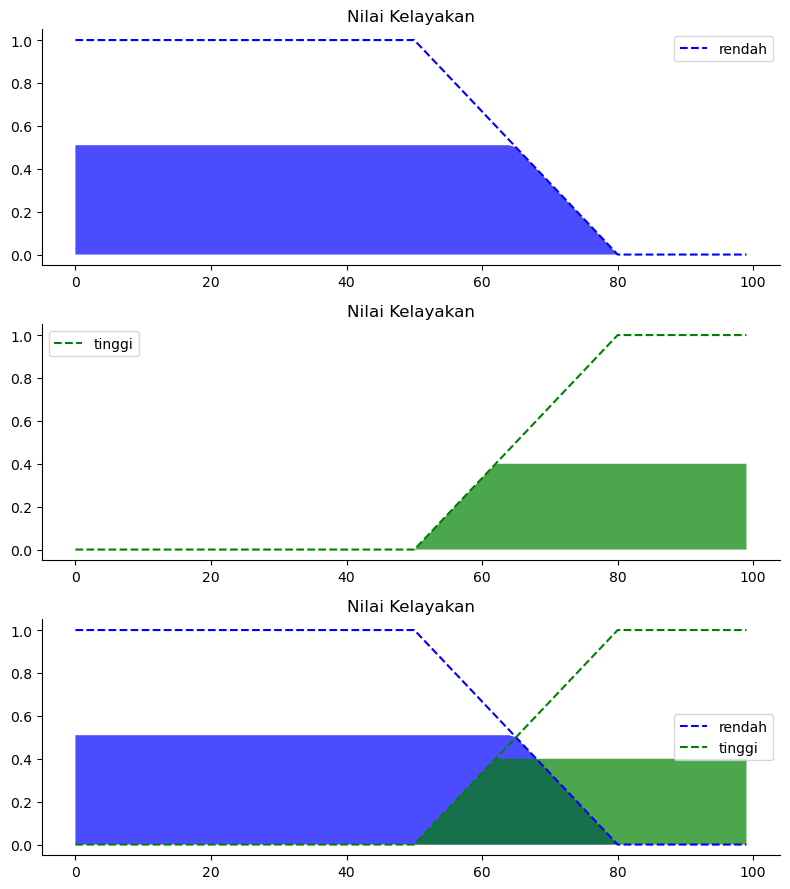

In [9]:
# Menyesuaikan nilai kelayakan mahasiswa A dengan nilai rendah dan tinggi
mhsA_nk_rendah = np.fmin(mhsA_nk_rendah, nk_rendah)
mhsA_nk_tinggi = np.fmin(mhsA_nk_tinggi, nk_tinggi)

# Inisialisasi titik awal untuk garis arsiran
nk0 = np.zeros_like(x_nk)
nkr = np.zeros_like(nk_rendah)
nkt = np.zeros_like(nk_tinggi)

# Visualisasi grafik
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

# Menampilkan area di bawah kurva nilai kelayakan rendah mahasiswa A
ax0.fill_between(x_nk, nkr, mhsA_nk_rendah, facecolor='b', alpha=0.7)
ax0.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='rendah')
ax0.set_title('Nilai Kelayakan')
ax0.legend()

# Menampilkan area di bawah kurva nilai kelayakan tinggi mahasiswa A
ax1.fill_between(x_nk, nkt, mhsA_nk_tinggi, facecolor='g', alpha=0.7)
ax1.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='tinggi')
ax1.set_title('Nilai Kelayakan')
ax1.legend()

# Menampilkan area di bawah kurva nilai kelayakan rendah dan tinggi mahasiswa A
ax2.fill_between(x_nk, nk0, mhsA_nk_rendah, facecolor='b', alpha=0.7)
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='rendah')
ax2.fill_between(x_nk, nk0, mhsA_nk_tinggi, facecolor='g', alpha=0.7)
ax2.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

# Menonaktifkan sumbu atas dan kanan pada grafik
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [10]:
# Mengimpor library numpy sebagai np
import numpy as np

# Aturan 5. JIKA IPK = Cukup dan Gaji = Kecil MAKA NK = Tinggi
nk_5 = np.fmin(ipk_mhsB[1], gaji_mhsB[0])

# Aturan 6. JIKA IPK = Cukup dan Gaji = Sedang MAKA NK = Rendah
nk_6 = np.fmin(ipk_mhsB[1], gaji_mhsB[1])

# Aturan 9. JIKA IPK = Bagus dan Gaji = Kecil MAKA NK = Tinggi
nk_9 = np.fmin(ipk_mhsB[2], gaji_mhsB[0])

# Aturan 10. JIKA IPK = Bagus dan Gaji = Sedang MAKA NK = Tinggi
nk_10 = np.fmin(ipk_mhsB[2], gaji_mhsB[1])

# Menghitung nilai kelayakan tinggi mahasiswa B
mhsB_nk_tinggi = np.fmax(nk_5, np.fmax(nk_9, nk_10))
mhsB_nk_rendah = nk_6

# Menampilkan nilai kelayakan mahasiswa B
print("nilai kelayakan mahasiswa B")
print("nilai rendah: ", mhsB_nk_rendah)
print("nilai tinggi: ", mhsB_nk_tinggi)

nilai kelayakan mahasiswa B
nilai rendah:  0.0
nilai tinggi:  0.5199999999999996


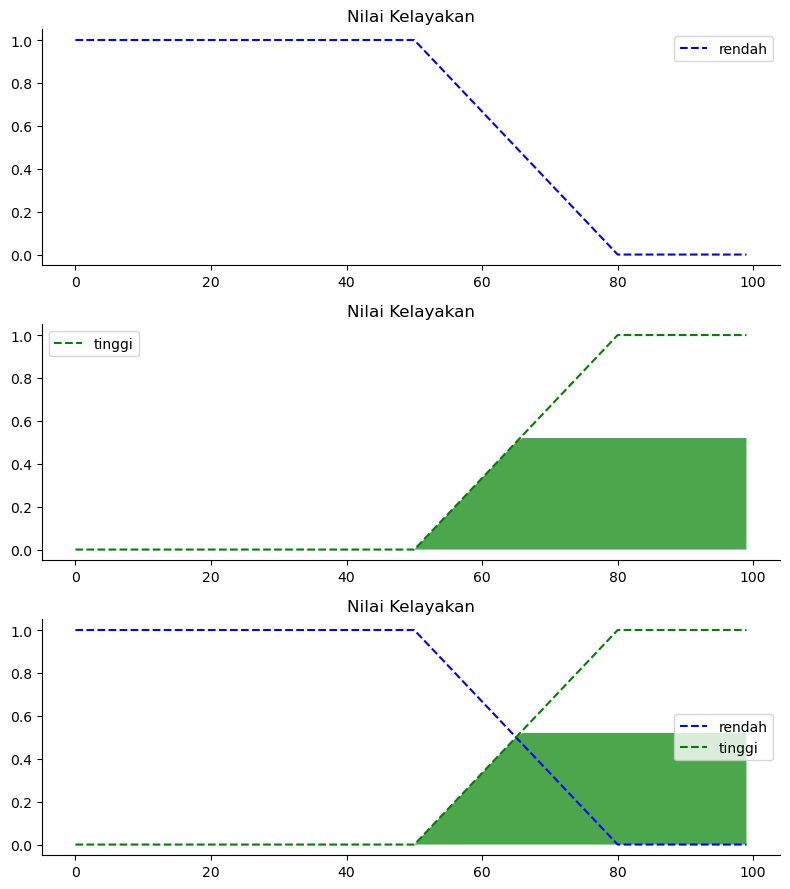

In [11]:
# Menyesuaikan nilai kelayakan rendah mahasiswa B dengan nilai kelayakan rendah yang sudah ada
mhsB_nk_rendah = np.fmin(mhsB_nk_rendah, nk_rendah)

# Menyesuaikan nilai kelayakan tinggi mahasiswa B dengan nilai kelayakan tinggi yang sudah ada
mhsB_nk_tinggi = np.fmin(mhsB_nk_tinggi, nk_tinggi)

# Menentukan titik awal untuk arsiran
nk0 = np.zeros_like(x_nk)
nkr = np.zeros_like(nk_rendah)
nkt = np.zeros_like(nk_tinggi)

# Visualisasi grafik dengan 3 sumbu
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

# Mengisi area di bawah kurva nilai kelayakan rendah mahasiswa B
ax0.fill_between(x_nk, nkr, mhsB_nk_rendah, facecolor='b', alpha=0.7)
ax0.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='rendah')
ax0.set_title('Nilai Kelayakan')
ax0.legend()

# Mengisi area di bawah kurva nilai kelayakan tinggi mahasiswa B
ax1.fill_between(x_nk, nkt, mhsB_nk_tinggi, facecolor='g', alpha=0.7)
ax1.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='tinggi')
ax1.set_title('Nilai Kelayakan')
ax1.legend()

# Menampilkan area di bawah kurva nilai kelayakan rendah dan tinggi mahasiswa B
ax2.fill_between(x_nk, nk0, mhsB_nk_rendah, facecolor='b', alpha=0.7)
ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, linestyle='--', label='rendah')
ax2.fill_between(x_nk, nk0, mhsB_nk_tinggi, facecolor='g', alpha=0.7)
ax2.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

# Menonaktifkan sumbu atas dan kanan pada grafik
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [12]:
# Menggabungkan nilai kelayakan rendah dan tinggi mahasiswa A
komposisi = np.fmax(mhsA_nk_rendah, mhsA_nk_tinggi)

# Melakukan defuzzifikasi dengan metode centroid
nk = fuzz.defuzz(x_nk, komposisi, 'centroid')
print("Nilai Kelayakan Mahasiswa A : ", nk)

# Menghitung nilai Fuzzy untuk fungsi keanggotaan
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)
nk_defuzzy

Nilai Kelayakan Mahasiswa A :  46.96316743343101


0.5098039215686272

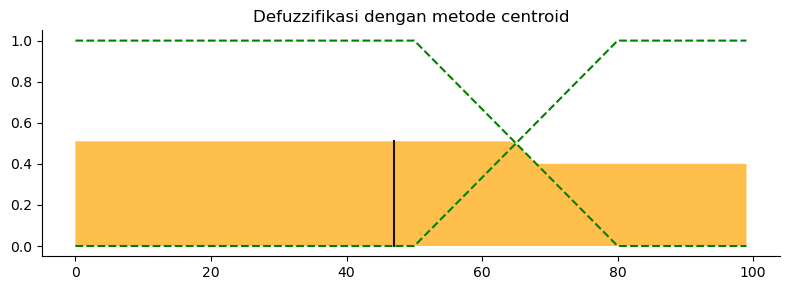

In [13]:
# Membuat plot untuk visualisasi hasil defuzzifikasi
fig, ax0 = plt.subplots(figsize=(8, 3))

# Plot kurva nilai kelayakan rendah
ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label='Rendah')

# Plot kurva nilai kelayakan tinggi
ax0.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')

# Mengisi area di antara kurva dengan warna Orange
ax0.fill_between(x_nk, nk0, komposisi, facecolor='Orange', alpha=0.7)

# Menandai titik centroid pada plot
ax0.plot([nk, nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9)

# Memberi judul pada plot
ax0.set_title('Defuzzifikasi dengan metode centroid')

# Mematikan sumbu atas dan kanan pada grafik
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [14]:
# Menghitung komposisi aturan berdasarkan nilai kelayakan rendah dan tinggi mahasiswa B
komposisi = np.fmax(mhsB_nk_rendah, mhsB_nk_tinggi)

# Melakukan defuzzifikasi untuk mendapatkan nilai kelayakan mahasiswa B
nk = fuzz.defuzz(x_nk, komposisi, 'centroid')
print("Nilai Kelayakan Mahasiswa B : ", nk)

# Menghitung nilai Fuzzy untuk fungsi keanggotaan
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)
nk_defuzzy


Nilai Kelayakan Mahasiswa B :  78.15624027388732


0.5199999999999996

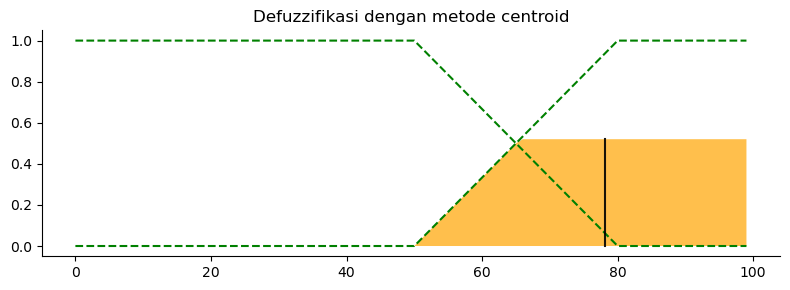

In [15]:
# Membuat plot untuk visualisasi hasil defuzzifikasi
fig, ax0 = plt.subplots(figsize=(8, 3))

# Plot kurva nilai kelayakan rendah
ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label='Rendah')

# Plot kurva nilai kelayakan tinggi
ax0.plot(x_nk, nk_tinggi, 'g', linewidth=1.5, linestyle='--', label='Tinggi')

# Mengisi area di antara kurva dengan warna Orange
ax0.fill_between(x_nk, nk0, komposisi, facecolor='Orange', alpha=0.7)

# Menandai titik centroid pada plot
ax0.plot([nk, nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9)

# Memberi judul pada plot
ax0.set_title('Defuzzifikasi dengan metode centroid')

# Mematikan sumbu atas dan kanan pada grafik
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()